# 1. Use pandas to create a Series from the following data:

## - a. Name the variable that holds the series fruits.

In [4]:
#import pands to use series
import pandas as pd

#create a series using name = pd.Series()
fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"])
#fruits = pd.Series(["kiwi", "mango", "mango", "mango","strawberry", "pineapple", "gala apple", "gala apple", "gala apple", "gala apple","honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"])

## - b. Run .describe() on the series to see what describe returns for a series of strings.

In [10]:
#dataFrame.describe()
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution
#excluding NaN values.
fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

## - c. Run the code necessary to produce only the unique fruit names.

In [58]:
#unique function returns the unique values as a NumPy array
fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

## - d. Determine how many times each value occurs in the series.

In [61]:
#value counts shows count per unique index
fruits.value_counts()

kiwi                4
mango               2
gala apple          1
tomato              1
honeydew            1
watermelon          1
honeycrisp apple    1
strawberry          1
pineapple           1
blackberry          1
blueberry           1
gooseberry          1
papaya              1
dtype: int64

## - e. Determine the most frequently occurring fruit name from the series.

In [22]:
#value counts shows count per unique index
#max shows maximum value of count
#idxmax shows the index name for max
print(fruits.value_counts().idxmax())

#can use mode for most often, prints index value 
print(fruits.mode())

#can also use nlargest function, which includes the count
fruits.value_counts().nlargest(1, keep='all').idxmax()

#use head
#fruits.value_counts().head(1)

kiwi
0    kiwi
dtype: object


'kiwi'

## - f. Determine the least frequently occurring fruit name from the series.

In [24]:
#nsmallest can show all smallest value count, if you specify keep = 'all'
fruits.value_counts().nsmallest(1, keep = 'all')

#can also do...
fruits.value_counts().nsmallest(1, keep = 'all').index.to_list()

['honeydew',
 'papaya',
 'tomato',
 'blueberry',
 'blackberry',
 'pineapple',
 'gooseberry',
 'strawberry',
 'honeycrisp apple',
 'gala apple',
 'watermelon']

## - g. Write the code to get the longest string from the fruits series.

In [29]:
#result finds the index value of the fruit with the longest string
result = fruits.map(len).idxmax()

#we print the fruit with that index
fruits[result]

result2 = fruits.str.len().idxmax
fruits[result2]

max(fruits.to_list(), key = len)

'honeycrisp apple'

## - h. Find the fruit(s) with 5 or more letters in the name.

In [126]:
#the conditional inside the array checks if the string length is greater than 5
print(fruits[(fruits.str.len()) > 5])

2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object


## - i. Capitalize all the fruit strings in the series.

In [104]:
#seriesname.str.capitalie() capitalizes each value in the series
#only works with strings and you need .str
fruits.str.capitalize()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala apple
5     Honeycrisp apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

## - j. Count the letter "a" in all the fruits (use string vectorization)

In [36]:
#function that counts a's within a string
def count_as(string):
    count = 0
    a_s = set("a")
    for ch in string:
        if ch in a_s:
            count = count + 1
    return count

#apply applies the function to the series string by string
#we take the count of this to find how many a's in the series as a whole
print('''The total amount of a's in the series is: ''' + str(fruits.apply(count_as).sum()))
fruits.apply(count_as)

#another option is to str count a
fruits.str.count('a')

The total amount of a's in the series is: 14


0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64

## - k. Output the number of vowels in each and every fruit.

In [40]:
#defines a function that counts the vowels in a string
def count_vowels(string):
    count = 0
    vowels = set("aeiouAEIOU")
    for ch in string:
        if ch in vowels:
            count = count + 1
    return count

#the function is applied to each string in the series
fruits.apply(count_vowels)

#another option is to string count with the values you're looking for
vowel_count = fruits.str.count('[aeiou]')

fruit_vowels = pd.DataFrame({'fruits': fruits, 'vowel_count': vowel_count})
fruit_vowels

,fruits,vowel_count
0,kiwi,2
1,mango,2
2,strawberry,2
3,pineapple,4
4,gala apple,4
5,honeycrisp apple,5
6,tomato,3
7,watermelon,4
8,honeydew,3
9,kiwi,2


## - l. Use the .apply method and a lambda function to find the fruit(s) containing two or more "o" letters in the name.

In [41]:
#the lambda function retruns True if there are 2 or more o's in each string in the series
#we use the lambda function with apply to use it on the series
#encasing in fruits[] shows us each value that returns true
fruits[fruits.apply(lambda n: True if n.count('o') >= 2 else False)]

fruits[fruits.apply(lambda fruit: fruit.count('o') >= 2)]

6         tomato
15    gooseberry
dtype: object

## - m. Write the code to get only the fruits containing "berry" in the name

In [44]:
#the lambda function retruns True if there is 'berry' in each string in the series
#we use the lambda function with apply to use it on the series
#encasing in fruits[] shows us each value that returns true
fruits[fruits.apply(lambda n: True if n.count('berry') == 1 else False)]

fruits[fruits.apply(lambda fruit: fruit.count('berry') == 1)]

fruits[fruits.str.contains('berry')]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

## - n. Write the code to get only the fruits containing "apple" in the name

In [177]:
#the lambda function retruns True if there is 'apple' in each string in the series
#we use the lambda function with apply to use it on the series
#encasing in fruits[] shows us each value that returns true
fruits[fruits.apply(lambda n: True if n.count('apple') == 1 else False)]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

## - o. Which fruit has the highest amount of vowels?

In [184]:
#we use the count_vowel function from before
#we use it on the series with apply
#idxmac finds the index of the value with the most vowels
index = fruits.apply(count_vowels).idxmax()

#we access this value with fruits[index]
print('The fruit with the most vowels is "' + fruits[index] + '".')

The fruit with the most vowels is "honeycrisp apple".


# 2. Use pandas to create a Series from the following data:

In [46]:
#creates a series with list of string money amounts
cash_flow = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23'])

## - a. What is the data type of the series?

In [187]:
#checks type variable
type(cash_flow)

pandas.core.series.Series

## - b. Use series operations to convert the series to a numeric data type.

In [48]:
#replaces characters that keep string from converting to float
#replacing $ and , with nothing
#astype converts to spcified value
cash_flow = cash_flow.apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype('float')

In [202]:
#prints variable of series to check if values converted correctly
cash_flow

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64

## - c. What is the maximum value? The minimum?

In [204]:
#can use numpy functions to find max and min of series
print(cash_flow.max())
print(cash_flow.min())

4789988.17
278.6


## - d. Bin the data into 4 equally sized intervals and show how many values fall into each bin.

In [217]:
#cuts values into bins, specify 4 bins
#use value count to see how many values in series are in each bin
pd.cut(cash_flow, 4).value_counts()

(-4511.11, 1197705.993]       7
(3592560.778, 4789988.17]     6
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
dtype: int64

## - e. Plot a histogram of the data. Be sure to include a title and axis labels.

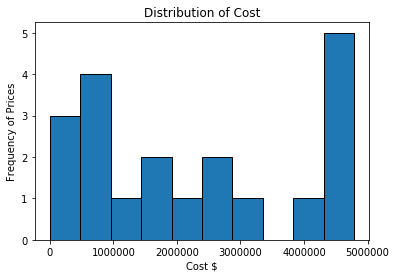

In [49]:
#importing matplotlib to plot series in graph
import matplotlib.pyplot as plt

#use plot.hist to plot histogram
plt.hist(cash_flow, ec = 'black')

#adds title to histogram
plt.title('Distribution of Cost')

#adds titles to x and y graphs
plt.xlabel('Cost $')
plt.ylabel('Frequency of Prices')
plt.show()

# 3. Use pandas to create a Series from the following data:

In [219]:
#creates series with grades
grades = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78])

## - a. What is the minimum exam score? The max, mean, median?

In [224]:
#we can use numpy to calculate the min, max, mean, and median
grades.min()
grades.max()
grades.mean()
grades.median()

79.0

## - b. Plot a histogram of the scores.

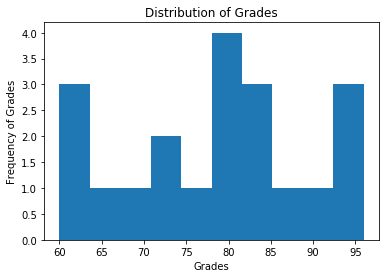

In [238]:
#plot histogram of grades
plt.hist(grades)
#sets title
plt.title('Distribution of Grades')
#sets axis labels
plt.xlabel('Grades')
plt.ylabel('Frequency of Grades')
#shows plot
plt.show()

## - c. Convert each of the numbers above into a letter grade. For example, 86 should be a 'B' and 95 should be an 'A'.

In [243]:
#sets function to assign letter grade according to grade point
def get_letter_grade(grade):
    #conditionals to assign each grade its letter value
    if 100 >= int(grade) >= 90:
        return 'A'
    
    if 89 >= int(grade) >= 80:
        return 'B'

    if 79 >= int(grade) >= 70:
        return 'C'

    if 69 >= int(grade) >= 60:
        return 'D'

    if 59 >= int(grade) >= 0:
        return 'F'

In [249]:
#applies letter grade function and reassigns to a variable
letter_grades = grades.apply(get_letter_grade)
print(letter_grades)

0     D
1     B
2     C
3     D
4     A
5     C
6     D
7     B
8     A
9     C
10    D
11    C
12    D
13    B
14    A
15    B
16    B
17    A
18    B
19    C
dtype: object


## - d. Write the code necessary to implement a curve. I.e. that grade closest to 100 should be converted to a 100, and that many points should be given to every other score as well.

In [248]:
#finds highest grade to subtract from 100 for the grade
curve = 100 - grades.max()
#creates variable for curved grades
curved = grades + curve
print(curved)

0      64
1      90
2      79
3      66
4      97
5      75
6      64
7      87
8      99
9      82
10     69
11     76
12     73
13     85
14    100
15     84
16     89
17     96
18     86
19     82
dtype: int64


# 4. Use pandas to create a Series from the following data:

In [370]:
#way to convert without pandas
letter = 'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'

In [371]:
#have to loop through to split
letters = []
for n in letter:
    letters.append(n)

In [372]:
#assigning the split list as series
letters = pd.Series(letters)

#using pandas
#first we create the letters as a list
letter = list('hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy')

#we create the letter list as a series
letters = pd.Series(letter)

In [375]:
#value count shows the frequency of each letter in the series
letters.value_counts()

y    13
p    12
w    10
n     9
m     9
k     9
b     9
c     8
a     8
d     8
q     8
x     8
r     8
h     8
o     8
v     7
t     7
z     7
u     7
e     6
j     6
f     6
i     5
s     5
g     5
l     4
dtype: int64

## - a. What is the most frequently occuring letter? Least frequently occuring?

In [374]:
#letters.value_counts().idxmax() returns the index(letter) with the highest frequency
#letters.value_counts().max() returns the frequency count of this letter
print('The most frequent letter is ' + letters.value_counts().idxmax() + ' at ' + str(letters.value_counts().max()))



The most frequent letter is y at 13


In [321]:
#letters.value_counts().idxmin() returns the index(letter) with the lowest frequency
#letters.value_counts().min() returns the frequency count of this letter
print('The least frequent letter is ' + letters.value_counts().idxmin() + ' at ' + str(letters.value_counts().min()))

The least frequent letter is l at 4


## - b. How many vowels are in the list?

In [378]:
#lamda function returns True of values in series if a vowel
vowels = letters[letters.apply(lambda n: True if n in ('aeiou') else False)]
#vowels.count() returns the count of how many vowels there are
print('There are ' + str(vowels.count()) + ' vowels in the series.')

There are 34 vowels in the series.


## - c. How many consonants are in the list?

In [380]:
#lamda function returns True of values in series if not a vowel
consonants = letters[letters.apply(lambda n: True if n not in ('aeiou') else False)]
#consonants.count() returns the count of how many vowels there are
print('There are ' + str(consonants.count()) + ' consonants in the series.')

There are 166 consonants in the series.


## - d. Create a series that has all of the same letters, but uppercased

In [330]:
#capitalize function applies to every value in the series
uppercase = letters.str.capitalize()
print(uppercase)

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object


## - e. Create a bar plot of the frequencies of the 6 most frequently occuring letters.

<BarContainer object of 6 artists>

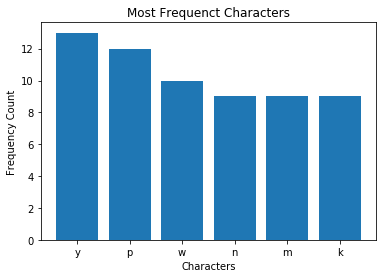

In [384]:
#assigns variable to 6 letters with the highest frequency
top_six = letters.value_counts().head(6)

#assigns x value the index(letters) of the top six
x = top_six.index

#assigns y variable the frequency counts of the top six
y = letters.value_counts().head(6).values

plt.title('Most Frequenct Characters')
plt.xlabel('Characters')
plt.ylabel('Frequency Count')
plt.bar(x,y)

# Use pandas Series for the data structure instead of lists and use Series subsetting/indexing and vectorization options instead of loops and lists.

# 17 list comprehension problems in python

In [65]:
fruit2 = ['mango', 'kiwi', 'strawberry', 'guava', 'pineapple', 'mandarin orange']

numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 19, 23, 256, -8, -4, -2, 5, -9]

# Example for loop solution to add 1 to each number in the list
numbers_plus_one = []
for number in numbers:
    numbers_plus_one.append(number + 1)

# Example of using a list comprehension to create a list of the numbers plus one.
numbers_plus_one = [number + 1 for number in numbers]

# Example code that creates a list of all of the list of strings in fruits and uppercases every string
#output = []
#for fruit in fruits:
    #output.append(fruit.upper())

In [7]:
fruits2 = pd.Series(fruit2)

In [66]:
numbers = pd.Series(numbers)

## 1. Rewrite the above example code using list comprehension syntax. Make a variable named uppercased_fruits to hold the output of the list comprehension. Output should be ['MANGO', 'KIWI', etc...]∆

In [136]:
#we can use .str operator on a series of strings
#.upper() uppercases all character in each string
uppercased_fruits = fruits2.str.upper()
uppercased_fruits

0              MANGO
1               KIWI
2         STRAWBERRY
3              GUAVA
4          PINEAPPLE
5    MANDARIN ORANGE
dtype: object

## 2. Create a variable named capitalized_fruits and use list comprehension syntax to produce output like ['Mango', 'Kiwi', 'Strawberry', etc...]

In [137]:
#we can use .str operator on series of string
#.capitalize() capitalizes each string in the series
capitalized_fruits = fruits2.str.capitalize()
capitalized_fruits

0              Mango
1               Kiwi
2         Strawberry
3              Guava
4          Pineapple
5    Mandarin orange
dtype: object

## 3. Use a list comprehension to make a variable named fruits_with_more_than_two_vowels. Hint: You'll need a way to check if something is a vowel.

In [138]:
#defines a function that counts the vowels in a string
def count_vowels(string):
    count = 0
    vowels = set("aeiouAEIOU")
    for ch in string:
        if ch in vowels:
            count = count + 1
    return count

#applies the function to the series
counts = fruits2.apply(count_vowels)

#returns only the fruit with a count of 2 or more vowels
fruits_with_more_than_two_vowels = fruits2[counts >= 2]
fruits_with_more_than_two_vowels

0              mango
1               kiwi
2         strawberry
3              guava
4          pineapple
5    mandarin orange
dtype: object

## 4. Make a variable named fruits_with_only_two_vowels. The result should be ['mango', 'kiwi', 'strawberry']

In [139]:
#we can use the same code as above, but change the comparison operator to equals 2
fruits_with_only_two_vowels = fruits2[counts == 2]
fruits_with_only_two_vowels

0         mango
1          kiwi
2    strawberry
dtype: object

## 5. Make a list that contains each fruit with more than 5 characters

In [140]:
#(fruits2.str.len()) > 5 returns True if the string has more than five character
#we return the series of True values by encasing it in fruits2[]
fruits_with_5_or_more = fruits2[((fruits2.str.len()) > 5)]
fruits_with_5_or_more

2         strawberry
4          pineapple
5    mandarin orange
dtype: object

## 6. Make a list that contains each fruit with exactly 5 characters

In [141]:
#(fruits2.str.len()) == 5 returns True if the string has five characters
#we return the series of True values by encasing it in fruits2[]
fruits_with_5 = fruits2[((fruits2.str.len()) == 5)]
fruits_with_5

0    mango
3    guava
dtype: object

## 7. Make a list that contains fruits that have less than 5 characters

In [15]:
import pandas as pd
fruit2 = ['mango', 'kiwi', 'strawberry', 'guava', 'pineapple', 'mandarin orange']
fruits2 = pd.Series(fruit2)

In [16]:
#(fruits2.str.len()) < 5 returns True if the string has less than five character
#we return the series of True values by encasing it in fruits2[]
fruits_less_than_5 = fruits2[((fruits2.str.len()) < 5)]
fruits_less_than_5

1    kiwi
dtype: object

In [59]:
# Step 1
# returns series of character length of all fruit in fruits
fruits2.str.len()

0     5
1     4
2    10
3     5
4     9
5    15
dtype: int64

In [60]:
# Step 2
# returns series of boolean values for character length less than 5
fruits2.str.len() < 5

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool

In [61]:
# Step 3
# create a subseries to return only the values that are true as a series itself
fruits2[fruits2.str.len() < 5]

1    kiwi
dtype: object

In [62]:
#can check the value returned is a series even though only one item
type(fruits2[fruits2.str.len() < 5])

pandas.core.series.Series

In [63]:
list(fruits2[fruits2.str.len() < 5])

['kiwi']

## 8. Make a list containing the number of characters in each fruit. Output would be [5, 4, 10, etc... ]

In [143]:
#.str.len() counts hhow many characters are in each string in the series
char_length = fruits2.str.len()
char_length

0     5
1     4
2    10
3     5
4     9
5    15
dtype: int64

## 9. Make a variable named fruits_with_letter_a that contains a list of only the fruits that contain the letter "a"

In [144]:
#(fruits2.str.count('a') > 0) returns True if there is one or more a in the string
#we return all True values in the series by encasing in fruits2[]
fruits_with_letter_a = fruits2[(fruits2.str.count('a') > 0)]
fruits_with_letter_a

0              mango
2         strawberry
3              guava
4          pineapple
5    mandarin orange
dtype: object

## 10. Make a variable named even_numbers that holds only the even numbers 

In [145]:
#(numbers % 2 == 0) returns True if the number is even
#we return all True values by encasing in numbers[]
even_numbers = numbers[(numbers % 2 == 0)]
even_numbers

0       2
2       4
4       6
6       8
8      10
14    256
15     -8
16     -4
17     -2
dtype: int64

## 11. Make a variable named odd_numbers that holds only the odd numbers

In [146]:
#(numbers % 2 != 0) returns True if the number is odd
#we return all True values by encasing in numbers[]
odd_numbers = numbers[(numbers % 2 != 0)]
odd_numbers

1      3
3      5
5      7
7      9
9     11
10    13
11    17
12    19
13    23
18     5
19    -9
dtype: int64

## 12.  Make a variable named positive_numbers that holds only the positive numbers

In [147]:
#(numbers > 0) returns True if the number is positive
#we return all True values by encasing in numbers[]
positive_numbers= numbers[(numbers > 0)]
positive_numbers

0       2
1       3
2       4
3       5
4       6
5       7
6       8
7       9
8      10
9      11
10     13
11     17
12     19
13     23
14    256
18      5
dtype: int64

## 13. Make a variable named negative_numbers that holds only the negative numbers

In [148]:
#(numbers < 0) returns True if the number is negative
#we return all True values by encasing in numbers[]
negative_numbers = numbers[(numbers < 0)]
negative_numbers

15   -8
16   -4
17   -2
19   -9
dtype: int64

## 14. Use a list comprehension w/ a conditional in order to produce a list of numbers with 2 or more numerals

In [69]:
#(numbers > 9) | (numbers < -9) returns True for each number with two digits
#we return the true values of the series by encasing in numbers[]
two_or_more_digits = numbers[(numbers > 9) | (numbers < -9)]
two_or_more_digits

numbers[~numbers.between(-9, 9)]

8      10
9      11
10     13
11     17
12     19
13     23
14    256
dtype: int64

## 15. Make a variable named numbers_squared that contains the numbers list with each element squared. Output is [4, 9, 16, etc...]

In [150]:
#we can preform arithmatic on the entire series using pandsa
numbers_squared = numbers ** 2
numbers_squared

0         4
1         9
2        16
3        25
4        36
5        49
6        64
7        81
8       100
9       121
10      169
11      289
12      361
13      529
14    65536
15       64
16       16
17        4
18       25
19       81
dtype: int64

## 16. Make a variable named odd_negative_numbers that contains only the numbers that are both odd and negative.

In [151]:
#(numbers < 0) & (numbers % 2 != 0) returns True if the number is both odd and negative
#we return only the true values by encasing in numbers[]
odd_negative_numbers = numbers[(numbers < 0) & (numbers % 2 != 0)]
odd_negative_numbers

19   -9
dtype: int64

## 17. Make a variable named numbers_plus_5. In it, return a list containing each number plus five. 

In [152]:
#we can perform arithmatic on a series using pandas
numbers_plus_5 = numbers + 5
numbers_plus_5

0       7
1       8
2       9
3      10
4      11
5      12
6      13
7      14
8      15
9      16
10     18
11     22
12     24
13     28
14    261
15     -3
16      1
17      3
18     10
19     -4
dtype: int64

## BONUS. Make a variable named "primes" that is a list containing the prime numbers in the numbers list. *Hint* you may want to make or find a helper function that determines if a given number is prime or not.

In [87]:
#defines a function that counts the factors in a number
#if count is greater than 2, the number is not prime
def prime_number(number):
    num = [n for n in range(1,101)]
    count = 0
    for n in num:
        if number > 0:
            if number % n == 0:
                count = count + 1
    return count

In [153]:
#we apply the function to the series, which return the count of the factors for each number
#we also require the number to be even
#we return all prime numbers by have the count of the function less than 2 and a positive number
primes = numbers[(((numbers.apply(prime_number)) <= 2) & (numbers > 0))]
primes

0      2
1      3
3      5
5      7
9     11
10    13
11    17
12    19
13    23
18     5
dtype: int64